In [1]:
# Load libraries and files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Local files
import password
import load_api as api

# Set standards
sns.set(style="whitegrid")

In [2]:
# Read yahoo data 28-feb-2023 to 28-feb-2024
usdc = pd.read_csv('data/USDC-USD.csv')
usdt = pd.read_csv('data/USDT-USD.csv')

usdc.describe()


,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,0.999896,1.000560,0.999061,0.999918,0.999918,4.120233e+09
std,0.001735,0.000401,0.006990,0.001565,0.001565,2.125912e+09
min,0.968300,0.995425,0.877400,0.971500,0.971500,1.036839e+09
25%,0.999949,1.000385,0.999477,0.999953,0.999953,2.747711e+09
50%,1.000025,1.000544,0.999661,1.000030,1.000030,3.630878e+09
75%,1.000115,1.000727,0.999796,1.000123,1.000123,5.087373e+09
max,1.000660,1.002967,0.999979,1.000751,1.000751,2.668221e+10


In [3]:
usdt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,1.000241,1.000962,0.999665,1.000251,1.000251,3.208781e+10
std,0.000837,0.001943,0.000662,0.000828,0.000828,1.512171e+10
min,0.998295,0.999229,0.995761,0.998382,0.998382,9.989859e+09
25%,0.999950,1.000487,0.999406,0.999965,0.999965,2.068569e+10
50%,1.000173,1.000745,0.999715,1.000174,1.000174,2.876351e+10
75%,1.000428,1.000980,0.999935,1.000434,1.000434,4.060030e+10
max,1.007690,1.029628,1.005939,1.007690,1.007690,8.766351e+10


In [4]:
usdc.sort_values(by="Close", ascending=True).head(10)
usdc[usdc["Close"] == usdc["Close"].min()] = .992

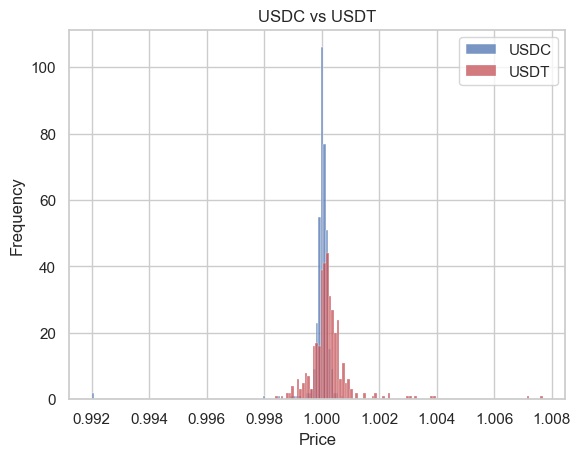

In [5]:
# Visualize the differences to USD
# The x limited has been set to 0.9995 to 1.005 to see the most frequent differences
# Some outliers have been cut off as a result


sns.histplot(usdc['Close'], bins=100, color='b', label='USDC')
sns.histplot(usdt['Close'], bins=100, color='r', label='USDT')

plt.title('USDC vs USDT')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

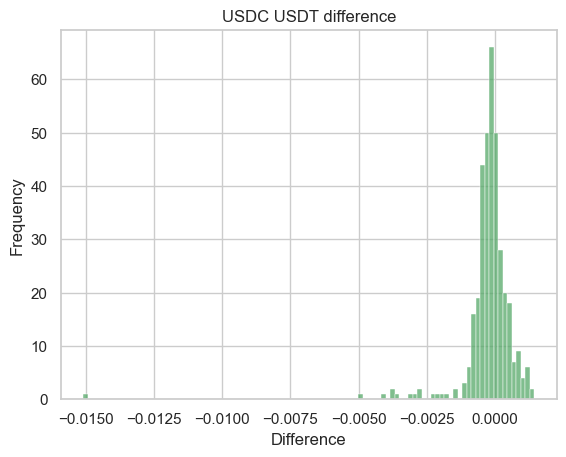

In [17]:
# Merge the USDC and USDT dataframes
usdc_usdt = usdc.merge(usdt, on='Date', suffixes=('_USDC', '_USDT'))
usdc_usdt['Difference'] = usdc_usdt['Close_USDC'] - usdc_usdt['Close_USDT']


# Visualize the differences between USDC and USDT
sns.histplot(usdc_usdt['Difference'], bins=100, color='g')
plt.title('USDC USDT difference')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

# To be a profitable trade, the difference should be greater than 0.001 or less than -0.001
# This is because the transaction fees are 0.1%
txn_cost = 0.001
betsize = 10000
profitable = usdc_usdt[(usdc_usdt['Difference'] > txn_cost) | (usdc_usdt['Difference'] < -txn_cost)]

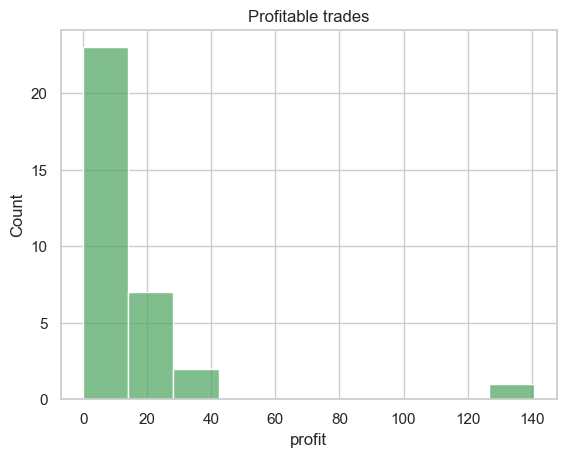

Total profit in the year is:  441.78000000000185
With ROI of:  0.04417800000000018


In [18]:

# Calculate the profit per trade
profitable = profitable[['Date', 'Difference']]
profitable["profit"] = (profitable['Difference'].abs()-txn_cost) * betsize

# Visualize the profitable trades
sns.histplot(profitable['profit'], bins=10, color='g')
plt.title('Profitable trades')
plt.show()
print("Total profit in the year is: ", profitable["profit"].sum())
print("With ROI of: ", profitable.profit.sum()/betsize)
